In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [2]:
import time
start = time.time()  # 시작 시간 저장

df = pd.read_csv("C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/p3 분석용 파일/p3_merge_final_2.csv")
df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# 약 13초 소요

time : 13.49541163444519


In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 대용량 데이터 불러오기 # 약 3초 소요

from pyarrow import csv

import time
start = time.time() 

df = csv.read_csv('C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/p3 분석용 파일/p3_merge_final_2.csv').to_pandas()

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 3.223031759262085


In [4]:
df

,FilterID,PID,UPSN,Platfm,Time___Time_,rawneph,corneph,Temp,RH,date,month,year,season,day,time,hour,weekday
0,KSN1668,004-002,MTL1010037,I,1:48:10,8.377,7.815731,26.10,41.7,2021-11-16,11.0,2021.0,Fall,16.0,01:48:10,1,화요일
1,KSN1668,004-002,MTL1010037,I,1:52:10,8.412,7.848386,26.10,40.7,2021-11-16,11.0,2021.0,Fall,16.0,01:52:10,1,화요일
2,KSN1668,004-002,MTL1010037,I,1:47:30,8.398,7.835324,25.95,41.1,2021-11-16,11.0,2021.0,Fall,16.0,01:47:30,1,화요일
3,KSN1668,004-002,MTL1010037,I,1:51:30,2.804,2.616129,26.00,40.7,2021-11-16,11.0,2021.0,Fall,16.0,01:51:30,1,화요일
4,KSN1668,004-002,MTL1010037,I,21:16:30,5.579,5.205200,26.20,41.9,2021-11-15,11.0,2021.0,Fall,15.0,21:16:30,21,월요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302981,KSN1729,030-002,MTL1010037,I,2:49:10,19.905,27.136020,32.60,67.8,2021-08-31,8.0,2021.0,Summer,31.0,02:49:10,2,화요일
7302982,KSN1729,030-002,MTL1010037,I,2:49:20,22.210,29.925376,32.60,67.5,2021-08-31,8.0,2021.0,Summer,31.0,02:49:20,2,화요일
7302983,KSN1729,030-002,MTL1010037,I,2:49:30,11.125,16.511053,32.60,67.4,2021-08-31,8.0,2021.0,Summer,31.0,02:49:30,2,화요일
7302984,KSN1729,030-002,MTL1010037,I,2:50:10,15.510,21.817486,32.60,67.7,2021-08-31,8.0,2021.0,Summer,31.0,02:50:10,2,화요일


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7302986 entries, 0 to 7302985
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FilterID      object 
 1   PID           object 
 2   UPSN          object 
 3   Platfm        object 
 4   Time___Time_  object 
 5   rawneph       float64
 6   corneph       float64
 7   Temp          float64
 8   RH            float64
 9   date          object 
 10  month         float64
 11  year          float64
 12  season        object 
 13  day           float64
 14  time          object 
 15  hour          int64  
 16  weekday       object 
dtypes: float64(7), int64(1), object(9)
memory usage: 947.2+ MB


In [15]:
# PID 004-003 : 4계절 모두 측정값 존재 
# 이 환자는 실외 측정값 없음

df[df["PID"] == "004-003"]["season"].unique()

array(['Fall', 'Summer', 'Winter', 'Spring'], dtype=object)

In [16]:
# PID 004-003 각 계절별 측정일자 확인

season_list = ['Fall', 'Summer', 'Winter', 'Spring']

for i in range(len(season_list)):
    date = df[(df["PID"] == "004-003") & (df["season"] == season_list[i])]["date"].unique()
    weekday = df[(df["PID"] == "004-003") & (df["season"] == season_list[i])]["weekday"].unique()
    print("{} : {} {}".format(season_list[i], date, weekday))


# 계절별로 측정 일자 수와 요일이 모두 일치하지는 않음. 
# 계절별로 보여주는 수밖에 없음. 

Fall : [datetime.date(2021, 11, 26) datetime.date(2021, 11, 29)
 datetime.date(2021, 11, 27) datetime.date(2021, 11, 28)
 datetime.date(2021, 11, 30)] ['금요일' '월요일' '토요일' '일요일' '화요일']
Summer : [datetime.date(2021, 8, 27) datetime.date(2021, 8, 28)
 datetime.date(2021, 8, 26) datetime.date(2021, 8, 30)
 datetime.date(2021, 8, 29)] ['금요일' '토요일' '목요일' '월요일' '일요일']
Winter : [datetime.date(2022, 2, 21) datetime.date(2022, 2, 22)
 datetime.date(2022, 2, 23) datetime.date(2022, 2, 19)
 datetime.date(2022, 2, 18) datetime.date(2022, 2, 20)] ['월요일' '화요일' '수요일' '토요일' '금요일' '일요일']
Spring : [datetime.date(2022, 5, 20) datetime.date(2022, 5, 21)
 datetime.date(2022, 5, 22) datetime.date(2022, 5, 23)
 datetime.date(2022, 5, 24) datetime.date(2022, 5, 25)] ['금요일' '토요일' '일요일' '월요일' '화요일' '수요일']


In [ ]:
# 계절별로 pm2.5농도 요일별 평균 bar chart 그리기
# x축은 요일. title에 측정기간 기재하기 

In [6]:
# 계절별, 날짜별, 요일별 pm2.5 평균

df_id = df[df["PID"] == "004-003"].groupby(['season', 'date', 'weekday'])['corneph'].agg('mean').reset_index()
df_id

,season,date,weekday,corneph
0,Fall,2021-11-26,금요일,12.287290
1,Fall,2021-11-27,토요일,78.180280
2,Fall,2021-11-28,일요일,153.413740
3,Fall,2021-11-29,월요일,59.855689
4,Fall,2021-11-30,화요일,313.447231
5,Spring,2022-05-20,금요일,7.892161
6,Spring,2022-05-21,토요일,14.156499
7,Spring,2022-05-22,일요일,17.269618
8,Spring,2022-05-23,월요일,29.370114
9,Spring,2022-05-24,화요일,9.720066


C:\Users\Soyoung Han\AppData\Local\Temp\ipykernel_25704\967638414.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall['colours'] = df_fall['corneph'].apply(get_colour)


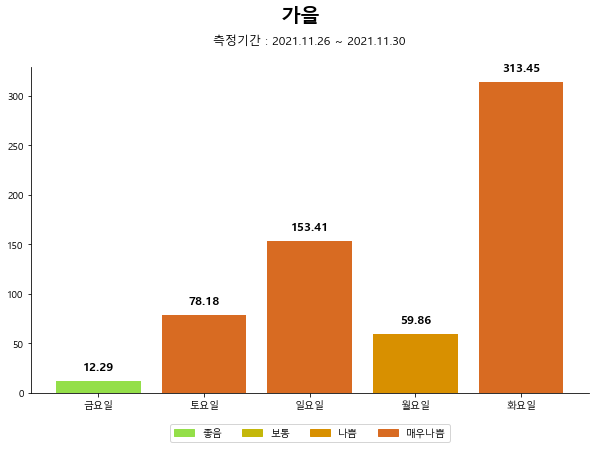

In [79]:
# 좋음 0~15
# 보통 16~35
# 나쁨 36~75
# 매우 나쁨 76이상 

# good = '#94df49'
# normal = '#c4b70a'
# bad = '#d89000'
# awful = '#d86b22'

df_fall = df_id[df_id["season"] == "Fall"]

def get_colour(x): 
    if x >= 76:
        return '#d86b22'
    elif x >=36:
        return '#d89000'
    elif x > 16:
        return '#c4b70a'
    else:
        return '#94df49'

df_fall['colours'] = df_fall['corneph'].apply(get_colour)

fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

bars = plt.bar(df_fall['weekday'], df_fall['corneph'], color = df_fall['colours'])
ax.spines[['right', 'top']].set_visible(False)

ax.bar_label(bars, padding=8, color='black', 
             fontsize=12, label_type='edge', fmt='%.2f',
            fontweight='bold')
fig.suptitle('가을', x= 0.5, y = 1.02, fontsize=20, weight='bold') 
plt.title("측정기간 : 2021.11.26 ~ 2021.11.30", x = 0.5, y = 1.05)

# Create a custom legend with two rectangles and labels
good = mpatches.Patch(color= '#94df49', label='좋음')
normal = mpatches.Patch(color='#c4b70a', label='보통')
bad = mpatches.Patch(color='#d89000', label='나쁨')
awful = mpatches.Patch(color='#d86b22', label='매우나쁨')
legend_handles = [good, normal, bad, awful]
legend_labels = ['좋음', '보통', '나쁨', '매우나쁨']

# Create a rectangle patch to represent the scale
scale_patch = mpatches.Rectangle((0, 0), 1, 1, color='grey', alpha=0.5)

# Add the legend handles and labels to the legend
legend_handles.append(scale_patch)

# Add the legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, loc=(0.25,-0.15), ncol = 4)

plt.show()

<ipython-input-34-3866aa993dcc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall['colours'] = df_fall['corneph'].apply(get_colour)


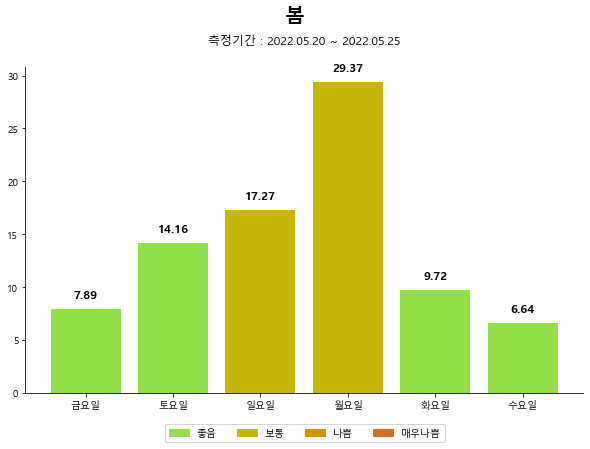

In [34]:
df_fall = df_id[df_id["season"] == "Spring"]

def get_colour(x): 
    if x >= 76:
        return '#d86b22'
    elif x >=36:
        return '#d89000'
    elif x > 16:
        return '#c4b70a'
    else:
        return '#94df49'

df_fall['colours'] = df_fall['corneph'].apply(get_colour)

fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

bars = plt.bar(df_fall['weekday'], df_fall['corneph'], color = df_fall['colours'])
ax.spines[['right', 'top']].set_visible(False)

ax.bar_label(bars, padding=8, color='black', 
             fontsize=12, label_type='edge', fmt='%.2f',
            fontweight='bold')
fig.suptitle('봄', x= 0.5, y = 1.02, fontsize=20, weight='bold') 
plt.title("측정기간 : 2022.05.20 ~ 2022.05.25", x = 0.5, y = 1.05)

# Create a custom legend with two rectangles and labels
good = mpatches.Patch(color= '#94df49', label='좋음')
normal = mpatches.Patch(color='#c4b70a', label='보통')
bad = mpatches.Patch(color='#d89000', label='나쁨')
awful = mpatches.Patch(color='#d86b22', label='매우나쁨')
legend_handles = [good, normal, bad, awful]
legend_labels = ['좋음', '보통', '나쁨', '매우나쁨']

# Create a rectangle patch to represent the scale
scale_patch = mpatches.Rectangle((0, 0), 1, 1, color='grey', alpha=0.5)

# Add the legend handles and labels to the legend
legend_handles.append(scale_patch)

# Add the legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, loc=(0.25,-0.15), ncols = 4)

# 저장하기 
# plt.savefig('test_graph.png', bbox_inches = 'tight', facecolor='#ffffff')
plt.show()

In [35]:
# 차트 함수

def barchart(season, season_title, start_date, end_date):
    df_season = df_id[df_id["season"] == season]

    def get_colour(x): 
        if x >= 76:
            return '#d86b22'
        elif x >=36:
            return '#d89000'
        elif x > 16:
            return '#c4b70a'
        else:
            return '#94df49'

    df_season['colours'] = df_season['corneph'].apply(get_colour)

    fig, ax = plt.subplots(figsize=(10,6))
    plt.rcParams['font.family'] = 'Malgun Gothic'

    bars = plt.bar(df_season['weekday'], df_season['corneph'], color = df_season['colours'])
    ax.spines[['right', 'top']].set_visible(False)

    ax.bar_label(bars, padding=8, color='black', 
             fontsize=12, label_type='edge', fmt='%.2f',
            fontweight='bold')
    fig.suptitle(season_title, x= 0.5, y = 1.02, fontsize=20, weight='bold') 
    plt.title("측정기간 : {} ~ {}".format(start_date, end_date), x = 0.5, y = 1.05)

    # Create a custom legend with two rectangles and labels
    good = mpatches.Patch(color= '#94df49', label='좋음')
    normal = mpatches.Patch(color='#c4b70a', label='보통')
    bad = mpatches.Patch(color='#d89000', label='나쁨')
    awful = mpatches.Patch(color='#d86b22', label='매우나쁨')
    legend_handles = [good, normal, bad, awful]
    legend_labels = ['좋음', '보통', '나쁨', '매우나쁨']

    # Create a rectangle patch to represent the scale
    scale_patch = mpatches.Rectangle((0, 0), 1, 1, color='grey', alpha=0.5)

    #Add the legend handles and labels to the legend
    legend_handles.append(scale_patch)

    # Add the legend to the plot
    plt.legend(handles=legend_handles, labels=legend_labels, loc=(0.25,-0.15), ncols = 4)

<ipython-input-35-b9b1494b7eb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['colours'] = df_season['corneph'].apply(get_colour)


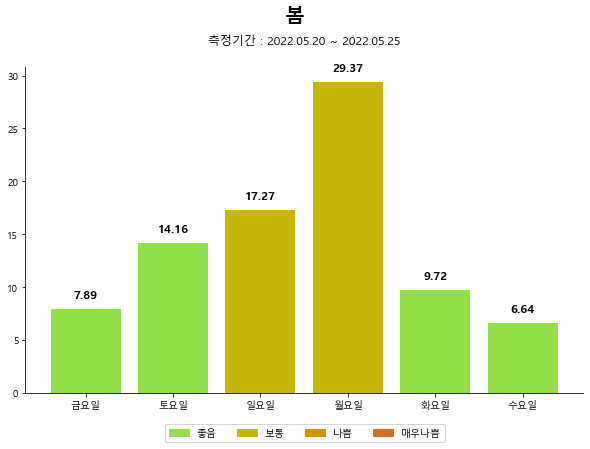

In [36]:
barchart("Spring", "봄", "2022.05.20", "2022.05.25")
plt.savefig('spring.png', bbox_inches = 'tight', facecolor='#ffffff')

<ipython-input-35-b9b1494b7eb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['colours'] = df_season['corneph'].apply(get_colour)


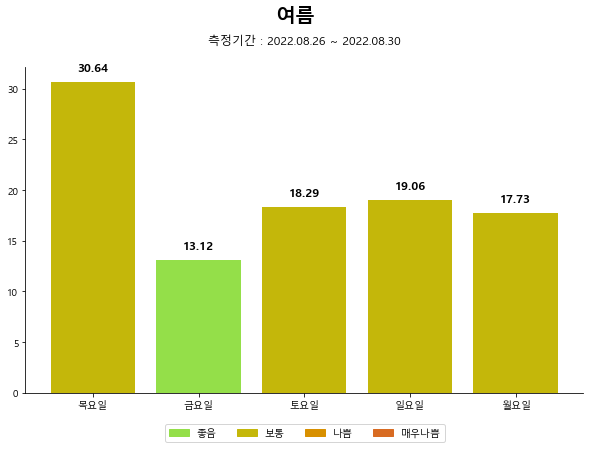

In [37]:
barchart("Summer", "여름", "2022.08.26", "2022.08.30")
plt.savefig('summer.png', bbox_inches = 'tight', facecolor='#ffffff')

<ipython-input-35-b9b1494b7eb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['colours'] = df_season['corneph'].apply(get_colour)


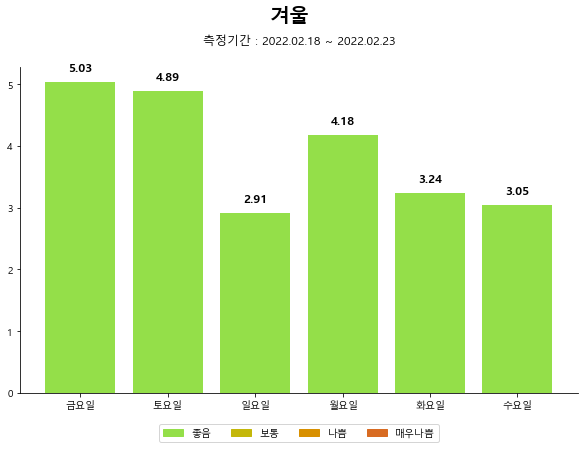

In [38]:
barchart("Winter", "겨울", "2022.02.18", "2022.02.23")
plt.savefig('winter.png', bbox_inches = 'tight', facecolor='#ffffff')

<ipython-input-35-b9b1494b7eb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['colours'] = df_season['corneph'].apply(get_colour)


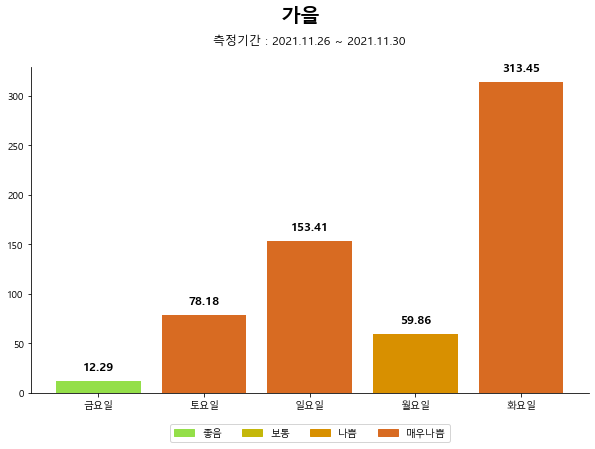

In [39]:
barchart("Fall", "가을", "2021.11.26", "2021.11.30")
plt.savefig('fall.png', bbox_inches = 'tight', facecolor='#ffffff')

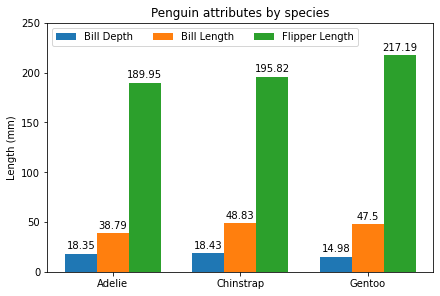

In [48]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i, (name, values) in enumerate(penguin_means.items()):
    rects = ax.bar(x + i*width, values, width, label=name)
    ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncol = 3)
ax.set_ylim(0, 250)

plt.show()

In [85]:
df_id.head(2)

,season,date,weekday,corneph
0,Fall,2021-11-26,금요일,12.28729
1,Fall,2021-11-27,토요일,78.18028


In [86]:
df_pivot = pd.pivot(df_id, index = ['weekday'], columns = 'season', values = 'corneph').reset_index()
df_pivot

season,weekday,Fall,Spring,Summer,Winter
0,금요일,12.287290,7.892161,13.115059,5.030397
1,목요일,NaN,NaN,30.641082,NaN
2,수요일,NaN,6.641884,NaN,3.049211
3,월요일,59.855689,29.370114,17.734647,4.183417
4,일요일,153.413740,17.269618,19.060577,2.908910
5,토요일,78.180280,14.156499,18.288764,4.890571
6,화요일,313.447231,9.720066,NaN,3.239015


In [87]:
# 수, 목요일 제외하기

df_pivot = df_pivot[~df_pivot['weekday'].isin(['수요일', '목요일'])].reset_index()
df_pivot = df_pivot.drop(labels = 'index', axis =1)

In [89]:
df_pivot.columns = ['weekday', '가을', '봄', '여름', '겨울']
df_pivot

,weekday,가을,봄,여름,겨울
0,금요일,12.287290,7.892161,13.115059,5.030397
1,월요일,59.855689,29.370114,17.734647,4.183417
2,일요일,153.413740,17.269618,19.060577,2.908910
3,토요일,78.180280,14.156499,18.288764,4.890571
4,화요일,313.447231,9.720066,NaN,3.239015


In [90]:
df_pivot['weekday'].tolist()

['금요일', '월요일', '일요일', '토요일', '화요일']

In [91]:
season_corneph = df_pivot[['봄', '여름', '가을','겨울']]
season_corneph.items()

<generator object DataFrame.items at 0x00000249C7EB9DD0>

In [98]:
import matplotlib.colors as mcolors

# Define custom colors for the colormap
custom_colors = ['#F2F79E', '#A8D4AD', '#92B9BD', '#967D69']

# Create a ListedColormap with custom colors
custom_cmap = mcolors.ListedColormap(custom_colors)



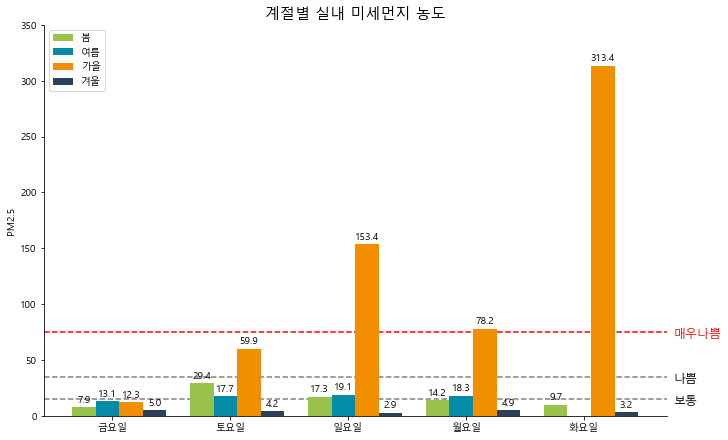

In [147]:
# 좋음 0~15
# 보통 16~35
# 나쁨 36~75
# 매우 나쁨 76이상 

weekday = ['금요일', '토요일', '일요일', '월요일', '화요일']
season_corneph = df_pivot[['봄', '여름', '가을','겨울']]
x = np.arange(len(weekday))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))

# Define custom colors for each bar
custom_colors = ['#F2F79E', '#A8D4AD', '#92B9BD', '#967D69']
custom_colors_2 = ['#99C24D', '#048BA8', '#F18F01', '#2E4057']

for i, (name, values) in enumerate(season_corneph.items()):
    rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors_2[i])
    ax.bar_label(rects, padding=3, fmt='%.1f')
    
ax.spines[['right', 'top']].set_visible(False)
ax.axhline(y=15, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=35, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=75, zorder=0, color='red', ls='--', lw=1.5)

ax.text(x=5.1, y=10, s='보통', ha='center', fontsize=12)
ax.text(x=5.1, y=30, s='나쁨', ha='center', fontsize=12)
ax.text(x=5.2, y=70, s='매우나쁨', ha='center', fontsize=12, color = 'red')
# bbox=dict(facecolor='white', edgecolor='grey', ls='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PM2.5')
ax.set_title('계절별 실내 미세먼지 농도', fontsize = 15)
ax.set_xticks(x + width*1.2, weekday)
ax.legend(loc='upper left')
ax.set_ylim(0, 350)
# ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
plt.show()


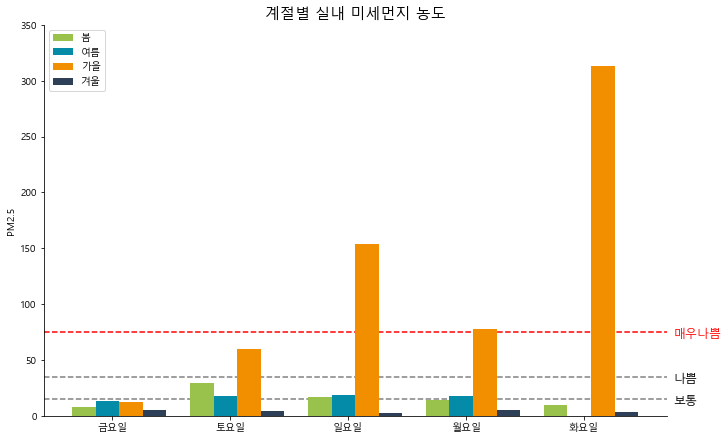

In [145]:
# 좋음 0~15
# 보통 16~35
# 나쁨 36~75
# 매우 나쁨 76이상 

weekday = ['금요일', '토요일', '일요일', '월요일', '화요일']
season_corneph = df_pivot[['봄', '여름', '가을','겨울']]
x = np.arange(len(weekday))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))

# Define custom colors for each bar
custom_colors = ['#F2F79E', '#A8D4AD', '#92B9BD', '#967D69']
custom_colors_2 = ['#99C24D', '#048BA8', '#F18F01', '#2E4057']

for i, (name, values) in enumerate(season_corneph.items()):
    rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors_2[i])
    
ax.spines[['right', 'top']].set_visible(False)
ax.axhline(y=15, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=35, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=75, zorder=0, color='red', ls='--', lw=1.5)

ax.text(x=5.1, y=10, s='보통', ha='center', fontsize=12)
ax.text(x=5.1, y=30, s='나쁨', ha='center', fontsize=12)
ax.text(x=5.2, y=70, s='매우나쁨', ha='center', fontsize=12, color = 'red')
# bbox=dict(facecolor='white', edgecolor='grey', ls='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PM2.5')
ax.set_title('계절별 실내 미세먼지 농도', fontsize = 15)
ax.set_xticks(x + width*1.2, weekday)
ax.legend(loc='upper left')
ax.set_ylim(0, 350)
# ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

plt.savefig('seasonal_without_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')

plt.show()